# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## 웹 크롤링 1/2

## 웹 페이지에서 필요한 정보 파싱
- <a href='http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'>The 50 Best Sandwiches in Chicago</a>
- 리스트 가져오기
- 각각에 연결된 가격과 주소정보 가져오기
- 가게들의 주소를 지도에 맵핑

In [1]:
from images import bigpycraft_bda as bpc
from IPython.display import Image 

url  = 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'

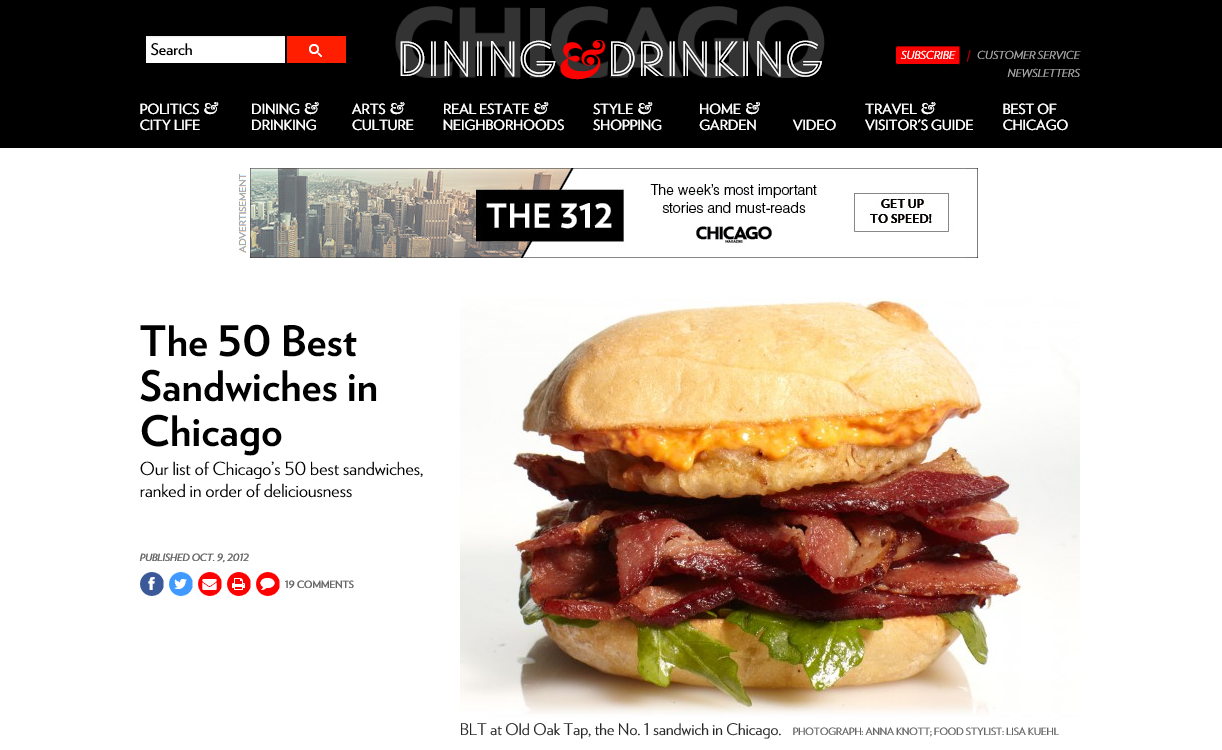

In [2]:
Image(bpc.BDA_PE_411_1)

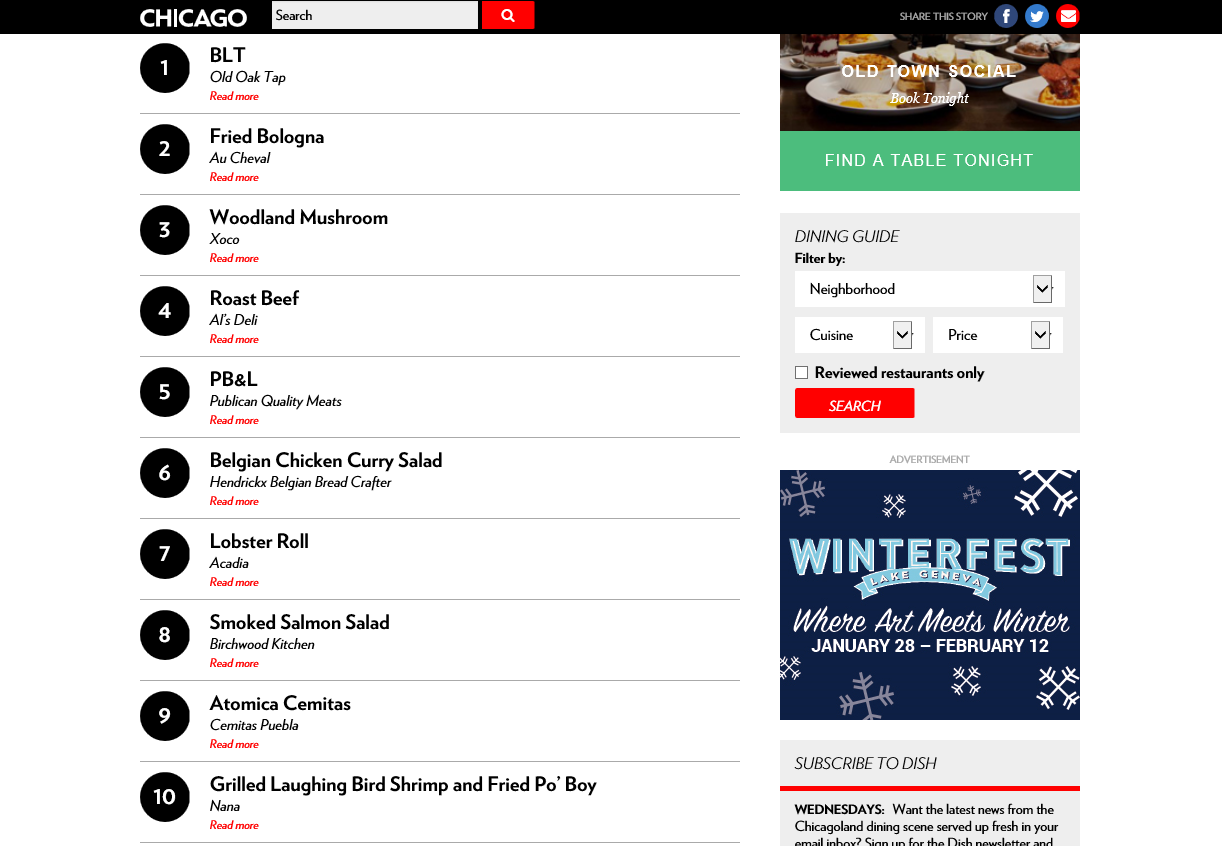

In [3]:
Image(bpc.BDA_PE_411_2)

### <font color='brown'> Beautiful Soup : 웹페이지를 읽어오는 가장 보편적인 패키지 </font>

In [4]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [5]:
# 구글에서 '50 Best Sandwiches' 검색
url  = 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
html = urlopen(url)
soup = BeautifulSoup(html, "lxml")

In [6]:
# 소스상세보기, Inspect로 확인
print(str(soup)[:1000])

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Urbis magnitudo. Fabulas magnitudo. -->
<meta charset="utf-8"/>
<style>a.edit_from_site {display: none !important;}</style>
<title>
  The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
    </title>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport"/>
<meta content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness" name="description"/>
<!-- <meta name="description" content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness"> -->
<meta content="sandwiches, dining" name="keywords"/>
<meta content="37873197144" property="fb:pages"/>
<link href="//www.googletagservices.com" rel="dns-prefetch"/>
<link href="//ajax.googleapis.com" rel="dns-prefetch"/>
<link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="//media.chicagomag.com" rel="dns-prefetch"/>
<link href="//ox-d.godengo.com/" rel="


In [7]:
html_title = soup.title
html_title

<title>
  The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
    </title>

In [8]:
tag_name = soup.title.name
tag_name

'title'

In [9]:
p_tag_name = soup.title.parent.name
p_tag_name

'head'

In [10]:
tag_text = soup.title.string
tag_text

'\r\n  The 50 Best Sandwiches in Chicago |\r\n  Chicago magazine\r\n      |  November 2012\r\n    '

In [11]:
soup.title.getText()

'\r\n  The 50 Best Sandwiches in Chicago |\r\n  Chicago magazine\r\n      |  November 2012\r\n    '

In [12]:
soup.title.get_text()

'\r\n  The 50 Best Sandwiches in Chicago |\r\n  Chicago magazine\r\n      |  November 2012\r\n    '

In [13]:
print(tag_text)


  The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
    


In [14]:
soup.div

<div id="reveal-bar-mobile">
<button id="reveal-bar-mobile-sections-button">More →</button>
<ul class="reveal-share-buttons list-no-bullets clearfix">
<li class="fb"><a href="https://www.facebook.com/sharer/sharer.php?u=http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/%3Futm_source=facebook.com%26utm_medium=referral%26utm_campaign=Facebook%20mobile%20reveal%20bar%2019493%20Nov%2006%202018%2014:20" onclick="ga('send',  'event', 'Sharing', 'Facebook share from mobile reveal bar','The 50 Best Sandwiches in Chicago'); return socialPopup('https://www.facebook.com/sharer/sharer.php?u=http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/%3Futm_source=facebook.com%26utm_medium=referral%26utm_campaign=Facebook%20mobile%20reveal%20bar%2019493%20Nov%2006%202018%2014:20');" target="_blank"><i class="icon-facebook"></i></a>
</li>
<li class="tw"><a href="https://twitter.com/share?text=The+50+Best+Sandwiches+in+Chicago&amp;url=http://www.chi

In [15]:
div_tags = soup.find_all('div')

In [16]:
len(div_tags)

217

In [17]:
div_tags[0]

<div id="reveal-bar-mobile">
<button id="reveal-bar-mobile-sections-button">More →</button>
<ul class="reveal-share-buttons list-no-bullets clearfix">
<li class="fb"><a href="https://www.facebook.com/sharer/sharer.php?u=http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/%3Futm_source=facebook.com%26utm_medium=referral%26utm_campaign=Facebook%20mobile%20reveal%20bar%2019493%20Nov%2006%202018%2014:20" onclick="ga('send',  'event', 'Sharing', 'Facebook share from mobile reveal bar','The 50 Best Sandwiches in Chicago'); return socialPopup('https://www.facebook.com/sharer/sharer.php?u=http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/%3Futm_source=facebook.com%26utm_medium=referral%26utm_campaign=Facebook%20mobile%20reveal%20bar%2019493%20Nov%2006%202018%2014:20');" target="_blank"><i class="icon-facebook"></i></a>
</li>
<li class="tw"><a href="https://twitter.com/share?text=The+50+Best+Sandwiches+in+Chicago&amp;url=http://www.chi

In [18]:
type(div_tags)

bs4.element.ResultSet

###  수집하고자 하는 데이터를 class명을 이용해서 구체적으로 찾아보기

In [19]:
print(soup.find_all('div', 'sammy'))

[<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-R

In [20]:
len(soup.find_all('div', 'sammy'))

50

In [21]:
print(soup.find_all('div', 'sammyListing'))

[<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>, <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>, <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>, <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/"><b>Roast Beef</b><br/>
Al’s Deli<br/>
<em>Read more</em> </a></div>, <div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/"><b>PB&amp;L</b><br/>
Publican Quality Meats<br/>
<em>Read more</em> </a></div>, <div class="sammyListing"><a href="http://www.chicag

In [22]:
print(soup.find_all('div', 'sammyRank'))

[<div class="sammyRank">1</div>, <div class="sammyRank">2</div>, <div class="sammyRank">3</div>, <div class="sammyRank">4</div>, <div class="sammyRank">5</div>, <div class="sammyRank">6</div>, <div class="sammyRank">7</div>, <div class="sammyRank">8</div>, <div class="sammyRank">9</div>, <div class="sammyRank">10</div>, <div class="sammyRank">11</div>, <div class="sammyRank">12</div>, <div class="sammyRank">13</div>, <div class="sammyRank">14</div>, <div class="sammyRank">15</div>, <div class="sammyRank">16</div>, <div class="sammyRank">17</div>, <div class="sammyRank">18</div>, <div class="sammyRank">19</div>, <div class="sammyRank">20</div>, <div class="sammyRank">21</div>, <div class="sammyRank">22</div>, <div class="sammyRank">23</div>, <div class="sammyRank">24</div>, <div class="sammyRank">25</div>, <div class="sammyRank">26</div>, <div class="sammyRank">27</div>, <div class="sammyRank">28</div>, <div class="sammyRank">29</div>, <div class="sammyRank">30</div>, <div class="sammyR

In [23]:
tmp = soup.find_all('div', 'sammyRank')
tmp[0].get_text()

'1'

In [24]:
listOfsoup = soup.find_all('div', 'sammy')
listOfsoup[0]

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>

In [25]:
rank = []

for item in listOfsoup:
    rank.append(item.find('div', 'sammyRank').get_text())
    
rank[:10]

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [26]:
listOfsoup[0].find("a").get_text()

'BLT\r\nOld Oak Tap\nRead more '

In [27]:
listOfsoup[0].find("a")['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

### <font color='brown'> 정규식 : Regular Expresion 모듈 </font>

In [28]:
import re

In [29]:
tmpString = str(listOfsoup[0].find("a").get_text())
tmpString

'BLT\r\nOld Oak Tap\nRead more '

#### <font color='blue'> # \n or \r\n 으로 들어가는 부분을 구분 </font>

In [30]:
re.split(('\n|\r\n'), tmpString)

['BLT', 'Old Oak Tap', 'Read more ']

In [31]:
re.split(('\n|\r\n'), tmpString)[0]

'BLT'

In [32]:
re.split(('\n|\r\n'), tmpString)[1]

'Old Oak Tap'

In [33]:
listOfsoup[10].find("a")["href"]

'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Lula-Cafe-Ham-and-Raclette-Panino/'

In [34]:
rank = []
mainMenu = []
cafeName = []
urlAdd   = []

for item in listOfsoup:
    rank.append(item.find('div', 'sammyRank').get_text())
    
    tmpString = str(item.find("a").get_text())
    mainMenu.append(re.split(('\n|\r\n'), tmpString)[0])
    cafeName.append(re.split(('\n|\r\n'), tmpString)[1])
    
    urlAdd.append(item.find("a")["href"])

In [35]:
rank[:5]

['1', '2', '3', '4', '5']

In [36]:
mainMenu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

In [37]:
cafeName[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [38]:
urlAdd[:10]

['/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 '/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 '/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 '/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 '/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Hendrickx-Belgian-Bread-Crafter-Belgian-Chicken-Curry-Salad/',
 '/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Acadia-Lobster-Roll/',
 '/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Birchwood-Kitchen-Smoked-Salmon-Salad/',
 '/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Cemitas-Puebla-Atomica-Cemitas/',
 '/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Nana-Grilled-Laughing-Bird-Shrimp-and-Fried-Oyster-Po-Boy/']

In [39]:
urlAdd[5][:4]

'http'

In [40]:
rank = []

mainMenu = []
cafeName = []
urlAdd   = []

for item in listOfsoup:
    rank.append(item.find('div', 'sammyRank').get_text())
    
    tmpString = str(item.find("a").get_text())
    tmp = [tmpLine for tmpLine in re.split(('\n|\r\n'), tmpString)]
    mainMenu.append(tmp[0])
    cafeName.append(tmp[1])
    
    tmp2 = item.find("a")["href"]
    if tmp2[:4] != 'http':
        urlAdd.append('http://www.chicagomag.com'+item.find("a")["href"])
    else :
        urlAdd.append(item.find("a")["href"])

In [41]:
urlAdd[:10]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Hendrickx-Belgian-Bread-Crafter-Belgian-Chicken-Curry-Salad/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Acadia-Lobster-Roll/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Birchwood-Kitchen-Smoked-Salmon-Salad/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/

#### <font color='blue'> # 가져온 데이터를 데이터프레임으로 정라한 후,  파일로 저장하기 </font>

In [42]:
import pandas as pd

data = {'Rank':rank, 'Menu':mainMenu, 'Cafe':cafeName, 'URL':urlAdd}
df = pd.DataFrame(data)

In [43]:
df.head(10)

,Cafe,Menu,Rank,URL
0,Old Oak Tap,BLT,1,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,Au Cheval,Fried Bologna,2,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,Xoco,Woodland Mushroom,3,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,Al’s Deli,Roast Beef,4,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,Publican Quality Meats,PB&L,5,http://www.chicagomag.com/Chicago-Magazine/Nov...
5,Hendrickx Belgian Bread Crafter,Belgian Chicken Curry Salad,6,http://www.chicagomag.com/Chicago-Magazine/Nov...
6,Acadia,Lobster Roll,7,http://www.chicagomag.com/Chicago-Magazine/Nov...
7,Birchwood Kitchen,Smoked Salmon Salad,8,http://www.chicagomag.com/Chicago-Magazine/Nov...
8,Cemitas Puebla,Atomica Cemitas,9,http://www.chicagomag.com/Chicago-Magazine/Nov...
9,Nana,Grilled Laughing Bird Shrimp and Fried Po’ Boy,10,http://www.chicagomag.com/Chicago-Magazine/Nov...


#### <font color='blue'> # 컬럼 순서 조정하기 </font>

In [44]:
df = pd.DataFrame(data, columns=['Rank','Cafe','Menu','URL'])
df.head(5)

,Rank,Cafe,Menu,URL
0,1,Old Oak Tap,BLT,http://www.chicagomag.com/Chicago-Magazine/Nov...
1,2,Au Cheval,Fried Bologna,http://www.chicagomag.com/Chicago-Magazine/Nov...
2,3,Xoco,Woodland Mushroom,http://www.chicagomag.com/Chicago-Magazine/Nov...
3,4,Al’s Deli,Roast Beef,http://www.chicagomag.com/Chicago-Magazine/Nov...
4,5,Publican Quality Meats,PB&L,http://www.chicagomag.com/Chicago-Magazine/Nov...


#### <font color='blue'> # 웹파싱한 데이터 파일로 저장하기 </font>

In [45]:
df.to_csv('data/chicagomag_info.csv', sep=',', encoding='UTF-8')

In [46]:
% ls data

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>